Imports

In [ ]:
!pip install openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.7/383.7 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.2/325.2 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 1.3 MB/s eta 0:00:00


In [ ]:
from openai import OpenAI
import json
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Set API key

In [ ]:
client = OpenAI(api_key="")

Prompt template

In [ ]:
prompt = """ A video is inappropriate for children if the description contains physical violence (cartoonish, realistic, inclusion of gore),
  interpersonal violence (such as bullying, pranks, meanness, humor at expense of others, belittling ,controlling, talking down to, or manipulating others),
  self-harm or suicide,
  elements of scariness (horror, scary themes, creepy or suspenseful themes, loud and violent content, zombies, skeletons, scary masks, scary clowns, blood, fire in dangerous settings),
  mentally distressing scenes (car crashes, medical procedures etc),
  extreme stunts (depictions of life endangering or high-risk physical activities/challenges),
  sexual content (innuendos, overt sexual behavior, nudity, sexual themes, sexual suggestiveness),
  discrimination (based on race/ethnicity/gender/ability),
  offensive language (from mild words such as "idiot" and "stupid" to severe swearing, hate speech or signs),
  drinking, drugs, smoking, gambling, crude humour,
  inappropriate clothing (with significant skin exposure),
  death,
  intimacy (sensual physical contact, dating and relationships, apparent romantic conduct between subjects/actors).

  You have been given a textual description of a video:
  "{description}"

  Based on this descriptive text, is the video inappropriate according to the criteria above?
  If it is, label it as "inappropriate".
  If it is not, label it as "irrelevant".
  If the video is directed towards kids, label it as "child-directed".

  Justify your conclusion.

  Also, if language is provided, you may analyze it with that as well.

  Make the outputs in JSON format.
  """

Define JSON schema

In [ ]:
output_schema = {
  "type": "object",
  "properties": {
    "label": {
      "type": "string",
      "enum": ["inappropriate", "child-directed", "irrelevant"]
    },
    "justification": {
      "type": "string",
      "minLength": 10
    }
  },
  "required": ["label", "reasoning"]
}

Define function

In [ ]:
def classify_video(client, text_input):

  response = client.chat.completions.create(
      model="gpt-4o-2024-08-06",
      messages=[
          {
              "role": "system",
              "content": "You are a content classification assistant that evaluates video descriptions according to strict guidelines."
          },
          {
              "role": "user",
              "content": text_input
          }
      ],
      response_format={
          "type": "json_schema",
          "json_schema": {
              "name": "output_schema",
              "schema": output_schema
          }
      }
  )


  return response.choices[0].message.content

Test

In [ ]:
description = """
"
VIDEO DURATION: 1:32

GENERAL OVERVIEW: This is a movie trailer for the French comedy film ""Les Blagues de Toto 2: Classe Verte"" (Toto's Jokes 2: Green Class). The trailer focuses on the antics of a mischievous young boy named Toto, who is on a school trip to a farm.

DETAILED TIMELINE:
[00:00-00:08] - The trailer begins with a scene inside a house. A woman (mother) is talking to her son, Toto, about his school trip. Toto, dressed in a striped shirt, is sitting at the table, appearing bored. The scene then cuts to a schoolyard where children, including Toto, are playing.
[00:08-00:21] - The trailer transitions to a scene of teachers preparing for the school trip.  There's a shot of a bus pulling away from the school and kids on the bus. The bus is filled with excited children.
[00:21-00:32] - The bus arrives at the farm. Children get off the bus and Toto is introduced to the farmhouse. Shots of farm animals and the setting are shown.
[00:32-00:55] - The trailer shows children interacting with the farm animals, playing games, and engaging in various activities. The atmosphere is fun and lighthearted.
[00:55-01:15] -  Toto's mother is talking about Toto being a ""little sly fox,"" and we see him being mischievous. The trailer then transitions to a night scene where Toto is up to more shenanigans, including scaring a character. The trailer cuts to a montage of various scenes of children having fun at the farm, highlighting the humorous and lighthearted nature of the movie.
[01:15-01:32] - The trailer ends with various comedic scenes involving Toto, including a chase scene. The film title ""Les Blagues de Toto 2: Classe Verte"" (Toto's Jokes 2: Green Class) is displayed, along with the release date ""Au cinéma le 2 août"" (In theaters August 2nd).

AUDIO DESCRIPTION: The trailer features a lively and upbeat soundtrack that blends with various sound effects. The dialogue is primarily in French, with a lighthearted and playful tone. The trailer uses comedic sound effects to emphasize the humorous situations.

NOTABLE ELEMENTS:
- The trailer features a bright and colorful visual style, with a whimsical and playful tone.
- It focuses on children, making it likely to appeal to a family audience.
- The presence of farm animals and outdoor scenes adds to the wholesome theme.
- The movie title and release date are clearly displayed.

TECHNICAL NOTES:
- The trailer is professionally produced, with high-quality video and editing.
- The use of fast cuts, music, and sound effects contributes to the overall tone and pace of the trailer.
- The editing is dynamic and effectively highlights the movie's humorous elements.

"
"""

In [ ]:
formatted_prompt = prompt.format(description=description)
print(formatted_prompt)

 A video is inappropriate for children if the description contains physical violence (cartoonish, realistic, inclusion of gore),
  interpersonal violence (such as bullying, pranks, meanness, humor at expense of others, belittling ,controlling, talking down to, or manipulating others),
  self-harm or suicide,
  elements of scariness (horror, scary themes, creepy or suspenseful themes, loud and violent content, zombies, skeletons, scary masks, scary clowns, blood, fire in dangerous settings),
  mentally distressing scenes (car crashes, medical procedures etc),
  extreme stunts (depictions of life endangering or high-risk physical activities/challenges),
  sexual content (innuendos, overt sexual behavior, nudity, sexual themes, sexual suggestiveness),
  discrimination (based on race/ethnicity/gender/ability),
  offensive language (from mild words such as "idiot" and "stupid" to severe swearing, hate speech or signs),
  drinking, drugs, smoking, gambling, crude humour,
  inappropriate clot

In [ ]:
classification = classify_video(client, formatted_prompt)
print(classification)

{"label":"child-directed","justification":"The video description indicates that this is a movie trailer for a French comedy film centered around a mischievous young boy named Toto on a school trip to a farm. The tone of the trailer is described as lighthearted, playful, and humorous, with a focus on children, suggesting the content is family-friendly and appealing to a younger audience. The inclusion of farm animals, outdoor scenes, and an overall wholesome theme further supports that the video is intended for a child or family audience. There are no elements in the description that would categorize the content as inappropriate for children. Therefore, the video is classified as 'child-directed.'"}


# Running for all videos

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Safe Online Global/csvs/final_desc_without_inaudible_excluded.csv',index_col=0)
df

,video_id,gemini_descriptions,primary_tag,secondary_tag,rating,manual_description
0,PFNtS5E5VTo,\n\nVIDEO DURATION: 00:14\n\nGENERAL OVERVIEW...,child directed,Toys,NaN,disney toys
1,a3FUPmqyz74,\n\n\nVIDEO DURATION: 00:31\n\nGENERAL OVERVI...,child directed,Play and Adventure,NaN,outdoor summer activities and pool
2,dMBevlP_R_g,\n\nVIDEO DURATION: 00:15\n\nGENERAL OVERVIEW...,child directed,Toys,NaN,lego toys
3,enNOZJSDFFs,\nVIDEO DURATION: 0:30\n\nGENERAL OVERVIEW: T...,child directed,Play and Adventure,NaN,"skistar holidays, activities for kids"
4,fOdo1GkzZAk,\nVIDEO DURATION: 04:28\n\nGENERAL OVERVIEW: ...,child directed,Educational Content,NaN,adapted mind ad
...,...,...,...,...,...,...
780,aBpSfU6IwuU,\nVIDEO DURATION: 00:35\n\nGENERAL OVERVIEW: ...,child directed,Toys,NaN,monster high doll unboxing
781,6OymTXVO_Is,\nVIDEO DURATION: 00:29\n\nGENERAL OVERVIEW: ...,child directed,Toys,NaN,monster high doll
782,2BVILYtTs1o,\nVIDEO DURATION: 00:20\n\nGENERAL OVERVIEW: ...,child directed,Family friendly gaming,NaN,nintendo ad for animal crossing
783,ZRbpmnFKBUY,\nVIDEO DURATION: 02:39\n\nGENERAL OVERVIEW: ...,child directed,Poems/Songs/Nursery Rhymes/Music,NaN,No Apologies (Music Video) ft. That Girl Lay L...


In [ ]:
video_ids = df['video_id'].to_list()
video_descriptions = df['gemini_descriptions'].to_list()
# video_descriptions

In [ ]:
outputs = {}

In [ ]:
# start = 350
# end = 350

for i,v in enumerate(video_ids):
  try:
    desc = video_descriptions[i]

    formatted_prompt = prompt.format(description=desc)

    classification = classify_video(client, formatted_prompt)

    outputs[v] = classification
    print("Completed for",i)

  except:
    print(f"Error for video num: {i}, id={v}")

Completed for 0
Completed for 1
Completed for 2
Completed for 3
Completed for 4
Completed for 5
Completed for 6
Completed for 7
Completed for 8
Completed for 9
Completed for 10
Completed for 11
Completed for 12
Completed for 13
Completed for 14
Completed for 15
Completed for 16
Completed for 17
Completed for 18
Completed for 19
Completed for 20
Completed for 21
Completed for 22
Completed for 23
Completed for 24
Completed for 25
Completed for 26
Completed for 27
Completed for 28
Completed for 29
Completed for 30
Completed for 31
Completed for 32
Completed for 33
Completed for 34
Completed for 35
Completed for 36
Completed for 37
Completed for 38
Completed for 39
Completed for 40
Completed for 41
Completed for 42
Completed for 43
Completed for 44
Completed for 45
Completed for 46
Completed for 47
Completed for 48
Completed for 49
Completed for 50
Completed for 51
Completed for 52
Completed for 53
Completed for 54
Completed for 55
Completed for 56
Completed for 57
Completed for 58
Complet

In [ ]:
outputs

{'PFNtS5E5VTo': '{"label":"child-directed","justification":"The video description indicates that the content is centered around creative play using LEGO and go-karts themed after Disney Princesses. These elements, along with the emphasis on themes of creativity, playfulness, family fun, and safety, suggest that the video is designed to appeal to children\'s interests. The video lacks any mention of inappropriate content as per the provided criteria, such as violence, sexual content, offensive language, or other mature themes. Instead, it highlights brands often associated with children\'s entertainment (LEGO and Disney) and features a playful, friendly atmosphere. Therefore, the video is appropriately classified as \'child-directed\'."}',
 'a3FUPmqyz74': '{"label":"child-directed","justification":"The video description indicates that the content is an animated promotional piece for a waterpark, featuring cartoon characters and bright colors, which are stated to be targeting a younger a

In [ ]:
import json

with open('gpt-outputs-eman.json', 'w') as f:
    json.dump(outputs, f)

In [ ]:
new_outputs = {}
for k,v in outputs.items():
  try:
    new_outputs[k] = json.loads(v)
  except:
    print(k)

In [ ]:
with open('gpt-outputs-eman.json', 'w') as f:
    json.dump(outputs, f)

In [ ]:
predictions = {}
for k,v in new_outputs.items():
  predictions[k] = v['label']



In [ ]:
set(predictions.values())

{'child-directed', 'inappropriate', 'irrelevant'}

In [ ]:
ground_labels_df = pd.read_csv('/content/drive/MyDrive/Safe Online Global/csvs/ground_labels.csv')
ground_labels_df

,Video link,Primary Tag,Secondary Tag,Rating,Description,Available?
0,5KRcG9gVhio,inappropriate,Offensive language,Extreme,spanish mv; lyrics inappropriate,Yes
1,1dtzSRlfBDk,child directed,Educational Content,NaN,ad about a Math and logic based visual game. ...,Yes
2,1EYvCnQj1uQ,inappropriate,Offensive language,Extreme,spanish mv; inapp lyrics,Yes
3,qZKNY_jwcu8,inappropriate,Sexual content,Extreme,"spanish mv with a lot of sensual content, viol...",Yes
4,-Qv06jgZZNw,inappropriate,Death,Extreme,"spanish mv, bullet shots, scariness, suggestiv...",Yes
...,...,...,...,...,...,...
2515,eRaJzy7dtTk,child directed,Cartoons,NaN,ad for a compilation of the cartoon baby alive,Yes
2516,BqHBzimyRbM,irrelevant,Home and Lifestyle,NaN,Ad for a company that has deals on furnishing,Yes
2517,rYSTqeFRLo8,irrelevant,Gaming & Entertainment,NaN,Ad for a game to build settlements,Yes
2518,CllAJ6PkRIA,irrelevant,Health and Wellness,NaN,Ad for a medicinal supplement,Yes


In [ ]:
gpt_labels = []
ground_labels = []

for k,v in predictions.items():

  if v == 'inappropriate':
    gpt_labels.append(0) ## 0 is in app
  else:
    gpt_labels.append(1) ##

  if ground_labels_df[ground_labels_df['Video link']==k]['Primary Tag'].values[0] == 'inappropriate':
    ground_labels.append(0)
  else:
    ground_labels.append(1)

In [ ]:
import seaborn as sns
import matplotlib.colors as mcolors
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
print("Accuracy:",accuracy_score(ground_labels,gpt_labels))

Accuracy: 0.8337765957446809


In [ ]:
cf = confusion_matrix(ground_labels,gpt_labels)

In [ ]:
cf

## Confusion matrix whose i-th row and j-th column entry indicates the
## number of samples with true label being i-th class and predicted label being j-th class.


array([[102, 114],
       [ 11, 525]])

<Axes: >

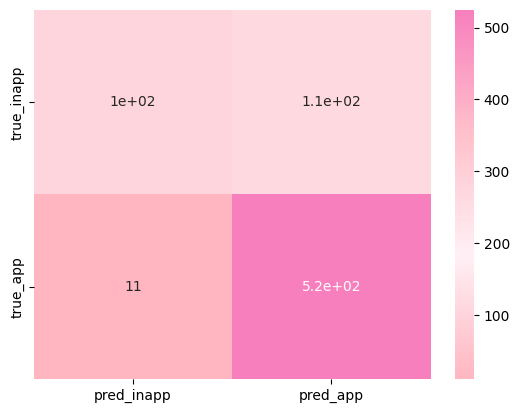

In [ ]:
pink_cmap = mcolors.LinearSegmentedColormap.from_list("pinkish", ["#FFB6C1", "#FFF0F5", "#FFC0CB", "#F77FBE"])

# Use this custom pink color map
sns.heatmap(cf, annot=True, cmap=pink_cmap, xticklabels=['pred_inapp', 'pred_app'], yticklabels=['true_inapp', 'true_app'])
# sns.heatmap(cf, annot=True, cmap="pink", xticklabels=['pred_inapp', 'pred_app'], yticklabels=['true_inapp', 'true_app'])

In [ ]:
print(classification_report(ground_labels,gpt_labels))

              precision    recall  f1-score   support

           0       0.90      0.47      0.62       216
           1       0.82      0.98      0.89       536

    accuracy                           0.83       752
   macro avg       0.86      0.73      0.76       752
weighted avg       0.84      0.83      0.82       752



Let me try with 3 classes

In [ ]:
gpt_labels = []
ground_labels = []

for k,v in predictions.items():



  if ground_labels_df[ground_labels_df['Video link']==k]['Primary Tag'].values[0] == 'inappropriate':
    ground_labels.append("inappropriate")
    gpt_labels.append(v)



In [ ]:
print("Accuracy:",accuracy_score(ground_labels,gpt_labels))

Accuracy: 0.4722222222222222


<Axes: >

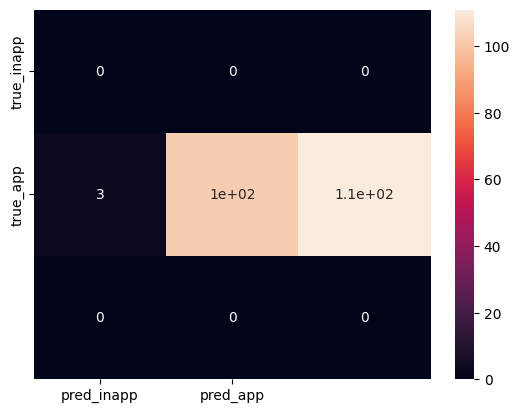

In [ ]:
cf = confusion_matrix(ground_labels,gpt_labels)
sns.heatmap(cf, annot=True,xticklabels=['pred_inapp','pred_app'], yticklabels=['true_inapp','true_app'])

In [ ]:
cf

## Confusion matrix whose i-th row and j-th column entry indicates the
## number of samples with true label being i-th class and predicted label being j-th class.


array([[  0,   0,   0],
       [  3, 102, 111],
       [  0,   0,   0]])